## Import Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv("./dataset/Cancer_Data.csv")
df = df.drop(["id","Unnamed: 32"],axis = 'columns')
df['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Prepare Results Table

In [5]:
all_model_accuracies_df = pd.DataFrame(columns=['Model', 'Base Model',"experiment 1","experiment 2","experiment 3","experiment 4","experiment 5"])
all_model_accuracies_df['Model'] =['logistic_regression','SVC','random_forest_classifier']

## 3 base model prepare

### Logistic Regression

In [6]:
# Log Reg
def logR_tranAndPredict(X,y,model_dict,parm_list):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state=43)
    logclassifier = LogisticRegression()
    parameters = {
    'C': [0.1, 1, 10]
}
    predictor_log = GridSearchCV(logclassifier, parameters, cv=5)
    predictor_log.fit(X_train, y_train.values.ravel())
    # getting the result
    accuracy_log_reg = predictor_log.score(X_test, y_test)
    model_dict['logistic_regression'] = accuracy_log_reg
    parm_list['logistic_regression']="{}".format(predictor_log.best_params_)


### SVC(Support Vector Classification)

In [7]:
#SVC
def Svc_tranAndPredict(X,y,model_dict,parm_list):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state=43)
    
    svc = SVC()
    parameters = {
    'C': [0.1, 1, 10],
    'gamma':['scale',0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}
    predictor_svc = GridSearchCV(svc, parameters, cv=5)
    predictor_svc.fit(X_train, y_train.values.ravel())
    # getting the result
    accuracy_svc = predictor_svc.score(X_test, y_test)
    model_dict['SVC'] = accuracy_svc
    parm_list['SVC']="{}".format(predictor_svc.best_params_)

### Random Forest Classifier

In [8]:
#Random Forest Classifier
def Rfc_tranAndPredict(X,y,model_dict,parm_list):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state=43)
    rfc = RandomForestClassifier()
    parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
    }
    predictor_rfc = GridSearchCV(rfc, parameters, cv=5)
    predictor_rfc.fit(X_train, y_train.values.ravel())
    # getting the result
    accuracy_rfc = predictor_rfc.score(X_test, y_test)
    model_dict['random_forest_classifier'] = accuracy_rfc
    parm_list['random_forest_classifier']="{}".format(predictor_rfc.best_params_)

### Base Train

In [10]:
# X, y = df.drop('diagnosis', axis=1), df[['diagnosis']]
X, y = df[["radius_mean"]], df[['diagnosis']]
model_dict = {}
parm_list={}
logR_tranAndPredict(X,y,model_dict,parm_list)
Svc_tranAndPredict(X,y,model_dict,parm_list)
Rfc_tranAndPredict(X,y,model_dict,parm_list)

In [11]:
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy',"best_parm"])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()
model_accuracies_df['best_parm'] = parm_list.values()
# store to total results table
all_model_accuracies_df['Base Model']= model_dict.values()
#show current results
model_accuracies_df

,Model,Accuracy,best_parm
0,logistic_regression,0.904255,{'C': 0.1}
1,SVC,0.904255,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
2,random_forest_classifier,0.904255,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."


## Feature Experiment 1: Feature Scaling

In [12]:
X, y = df[["radius_mean"]]**2, df[['diagnosis']]
model_dict = {}
parm_list={}
logR_tranAndPredict(X,y,model_dict,parm_list)
Svc_tranAndPredict(X,y,model_dict,parm_list)
Rfc_tranAndPredict(X,y,model_dict,parm_list)

In [13]:
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy',"best_parm"])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()
model_accuracies_df['best_parm'] = parm_list.values()
all_model_accuracies_df['experiment 1']= model_dict.values()
model_accuracies_df

,Model,Accuracy,best_parm
0,logistic_regression,0.904255,{'C': 0.1}
1,SVC,0.914894,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
2,random_forest_classifier,0.904255,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."


## Feature Experiment 2: Add New Features (add texture_mean)

In [14]:
# X, y = df.drop('diagnosis', axis=1), df[['diagnosis']]
X, y = df[["radius_mean","texture_mean"]], df[['diagnosis']]

model_dict = {}
parm_list={}
logR_tranAndPredict(X,y,model_dict,parm_list)
Svc_tranAndPredict(X,y,model_dict,parm_list)
Rfc_tranAndPredict(X,y,model_dict,parm_list)

In [15]:
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy',"best_parm"])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()
model_accuracies_df['best_parm'] = parm_list.values()
all_model_accuracies_df['experiment 2']= model_dict.values()
model_accuracies_df

,Model,Accuracy,best_parm
0,logistic_regression,0.914894,{'C': 1}
1,SVC,0.914894,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}"
2,random_forest_classifier,0.861702,"{'max_depth': 10, 'min_samples_split': 5, 'n_e..."


## Experiment 3: Transform Features via PCA

### Check the PCA 

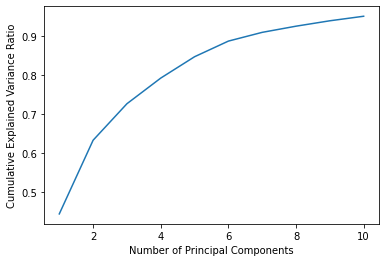

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X, y = df.drop('diagnosis', axis=1), df[['diagnosis']]
#normalize data before PCA
X = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X)

# Compute the cumulative explained variance for the top 10 components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_[:10])

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In the plot, we can see that the 8th components explain more than 95% of the total variance in the dataset, while components after 8 explain very little additional variance. 

### Apply PCA to the training data

In [29]:
X, y = df.drop('diagnosis', axis=1), df[['diagnosis']]
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)
model_dict = {}
parm_list={}
logR_tranAndPredict(X_pca,y,model_dict,parm_list)
Svc_tranAndPredict(X_pca,y,model_dict,parm_list)
Rfc_tranAndPredict(X_pca,y,model_dict,parm_list)

In [30]:
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy',"best_parm"])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()
model_accuracies_df['best_parm'] = parm_list.values()
all_model_accuracies_df['experiment 3']= model_dict.values()
model_accuracies_df

,Model,Accuracy,best_parm
0,logistic_regression,0.957447,{'C': 1}
1,SVC,0.952128,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
2,random_forest_classifier,0.930851,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."


## Experiment 4: Preprocessing Features (Normalize with min max scaling)

In [19]:
from sklearn.preprocessing import MinMaxScaler
#fit and transforming MinMaxScaler the dataframe 
mm = MinMaxScaler()
df_new_mm = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
X, y = df_new_mm[["radius_mean"]], df_new_mm[['diagnosis']]

model_dict = {}
parm_list={}
logR_tranAndPredict(X,y,model_dict,parm_list)
Svc_tranAndPredict(X,y,model_dict,parm_list)
Rfc_tranAndPredict(X,y,model_dict,parm_list)

In [20]:
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy',"best_parm"])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()
model_accuracies_df['best_parm'] = parm_list.values()
all_model_accuracies_df['experiment 4']= model_dict.values()
model_accuracies_df

,Model,Accuracy,best_parm
0,logistic_regression,0.904255,{'C': 10}
1,SVC,0.904255,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
2,random_forest_classifier,0.904255,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."


## Experiment 5: Noisy Indicators


### Define Noise Function

In [21]:
def noisy_indicators(X, noise_level):
    return np.random.uniform(low=-noise_level, high=noise_level, size=X.shape)

In [22]:
# add noise to dataset 
X, y = df[["radius_mean"]], df[['diagnosis']]
noise_level = 0.1
noise = noisy_indicators(X, noise_level)
X_noisy = X + noise

model_dict = {}
parm_list={}
logR_tranAndPredict(X_noisy,y,model_dict,parm_list)
Svc_tranAndPredict(X_noisy,y,model_dict,parm_list)
Rfc_tranAndPredict(X_noisy,y,model_dict,parm_list)

In [23]:
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy',"best_parm"])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()
model_accuracies_df['best_parm'] = parm_list.values()
all_model_accuracies_df['experiment 5']= model_dict.values()
model_accuracies_df

,Model,Accuracy,best_parm
0,logistic_regression,0.893617,{'C': 0.1}
1,SVC,0.914894,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
2,random_forest_classifier,0.904255,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."


## Table of Observations

Accuracy base on each model in each experiment 

In [31]:
all_model_accuracies_df

,Model,Base Model,experiment 1,experiment 2,experiment 3,experiment 4,experiment 5
0,logistic_regression,0.904255,0.904255,0.914894,0.957447,0.904255,0.893617
1,SVC,0.904255,0.914894,0.914894,0.952128,0.904255,0.914894
2,random_forest_classifier,0.904255,0.904255,0.861702,0.930851,0.904255,0.904255


There are no extra experiments I conducted. If I have more time, I would try to experiment by adding more features and see the impact of it.

## Recommend model

The winner of the combinations is logistic_regression, with 8 pca componments , and C = 1

In [32]:
X, y = df.drop('diagnosis', axis=1), df[['diagnosis']]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33)
tuned_model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=8)),
    ('log', LogisticRegression(C=1))
])

tuned_model.fit(X_train,y_train.values.ravel())
score = tuned_model.score(X_test, y_test)
print("tuned_model score:", score)

tuned_model score: 0.9787234042553191
